In [1]:
# -*- coding: utf-8 -*-
from sklearn.datasets import fetch_20newsgroups
import numpy as np
import matplotlib.pyplot as plt
#sdf

In [2]:
class1 = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware'];
class2 = ['rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey'];
class1_train = fetch_20newsgroups(subset = 'train', categories = class1, shuffle=True, random_state=42, remove=('headers','footers','quotes'));
class2_train = fetch_20newsgroups(subset = 'train', categories = class2, shuffle=True, random_state=42, remove=('headers','footers','quotes'));

## Problem 1)

In [4]:
from sklearn.feature_extraction import text
import re
import nltk 
import string
import numpy as np
from sklearn.feature_extraction import text

In [10]:
stop_words = text.ENGLISH_STOP_WORDS

from nltk.stem.snowball import SnowballStemmer
from nltk.tag import pos_tag
stemmer = SnowballStemmer("english")

def tokenizer_fun(text):
    new_text = re.sub(r'[^A-Za-z]', " ", text)
    new_text = re.sub("[,.-:/()?{}*$#&]"," ",new_text)  # remove all symbols
    new_text = "".join([ch for ch in new_text if ch not in string.punctuation])  # remove all punctuation
    new_text = "".join(ch for ch in new_text if ord(ch) < 128)  # remove all non-ascii characters
    new_text = new_text.lower() # convert to lowercase
    tokens =[word for sent in nltk.sent_tokenize(new_text) for word in nltk.word_tokenize(sent)]
    new_tokens = []
    for token in tokens:
        if re.search('[a-zA-Z]{2,}', token):
            new_tokens.append(token)     
    stem = [stemmer.stem(t) for t in new_tokens]
    tagged_sent = pos_tag(stem)
    new_stem = [word for word,pos in tagged_sent if pos == 'NN'] # remove all non-noun words
    return new_stem


In [11]:
from sklearn.datasets import fetch_20newsgroups
total_train = fetch_20newsgroups(subset='train', shuffle=True, random_state=42, categories = class1+class2, remove=('headers','footers','quotes'))

from sklearn.feature_extraction.text import TfidfVectorizer
TFxIDF = TfidfVectorizer(analyzer='word',tokenizer=tokenizer_fun, stop_words=stop_words,token_pattern='[a-zA-Z]{2,}',)
TFxIDF_data = TFxIDF.fit_transform(total_train.data)

In [12]:
print (TFxIDF_data.shape)

(4732, 25074)


## Problem 2)

In [64]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, max_iter = 1000, random_state=42).fit(TFxIDF_data)

In [27]:
total_test = fetch_20newsgroups(subset='train', shuffle=True, random_state=0, categories = class1+class2, remove=('headers','footers','quotes'))
test_target_group = [ int(x / 4) for x in total_test.target]

In [55]:
test_target_group[0:20]

[1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1]

In [29]:
TFxIDF_test = TFxIDF.fit_transform(total_test.data)

In [65]:
kmeans_predict = kmeans.predict(TFxIDF_test)

In [66]:
kmeans_predict[0:20]

array([1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1])

In [67]:
if sum(abs(kmeans_predict-test_target_group))>len(kmeans_predict)/2:
    i = 0
    for candidate in kmeans_predict:
        
        if candidate == 1:
            kmeans_predict[i] = 0
        elif candidate == 0:
            kmeans_predict[i] = 1
        i = i+1


In [68]:
kmeans_predict[0:20]

array([1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1])

In [69]:
sum(abs(kmeans_predict-test_target_group))

1191

In [26]:
total_test.target[0:20]

array([6, 7, 4, 2, 1, 3, 0, 7, 5, 3, 0, 5, 5, 5, 3, 1, 3, 0, 0, 2], dtype=int64)

Confusion matrix, without normalization
[[1222 1121]
 [  18 2371]]
Normalized confusion matrix
[[ 0.52  0.48]
 [ 0.01  0.99]]


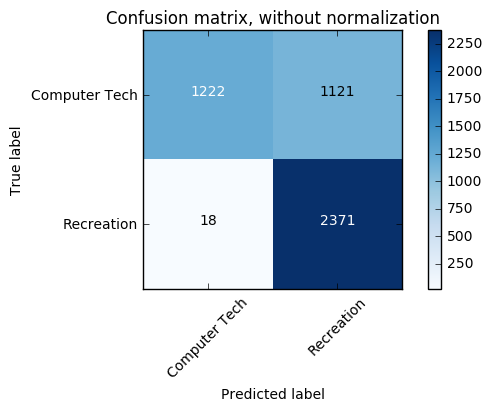

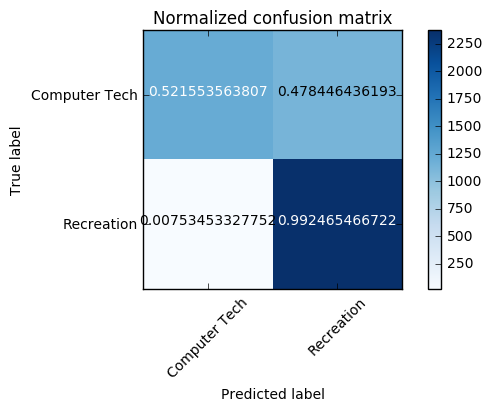

In [61]:
from sklearn.metrics import confusion_matrix
import itertools
class_names = ['Computer Tech', 'Recreation']
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(test_target_group, kmeans_predict)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()